# OpenML dataset: **_auction_verification_**
## **Description**
**Data Description**:

This dataset was created to verify properties of an Simultaneous Multi-Round (SMR) auction model.
The creators of the dataset use BPMN to model the design of the German 4G spectrum auction to sell 800 MHz band. The auction has four bidders and six products. A random budget is assigned from the range [1, 100] to each bidder for each product. A reserve price of 3 is also defined for all products. Further, each bidder has an individual capacity.

Each instance in the dataset represents a simulation of an auction.
**Attribute Description**:

1. *process.b1.capacity* - an integer in [0, 3], denoting the current capacities of the bidders
2. *process.b2.capacity* - an integer in [0, 3], denoting the current capacities of the bidders
3. *process.b3.capacity* - an integer in [0, 3], denoting the current capacities of the bidders
4. *process.b4.capacity* - an integer in [0, 3], denoting the current capacities of the bidders
5. *property.price* - an integer in [59, 90], denoting the price that is currently verified for the property.product
6. *property.product* - an integer in [1, 6], denoting the currently verified product
7. *property.winner* - an integer in [1, 4], denoting the bidder that is currently verified as winner for the property.product with the property.price. This feature is empty for iterations where the price is not clear yet.
8. *verification.result* - a boolean denoting if current property is satisfied in the underlying Petri Net or not, ignored column
9. *verification.time* - a positive integer, denoting the time (in ms) for verifying the current property against the underlying Petri Net, target feature

In [1]:
import openml

dataset = openml.datasets.get_dataset(44958)
X, y, cat_atr_mask, names = dataset.get_data(
    target=dataset.default_target_attribute, dataset_format="dataframe"
)

In [2]:
X.head()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner
0,0,0,2,1,59,1,0
1,0,0,2,1,59,2,0
2,0,0,2,1,59,4,0
3,0,0,2,1,59,6,0
4,0,0,2,1,60,1,0


In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   process.b1.capacity  2043 non-null   uint8   
 1   process.b2.capacity  2043 non-null   uint8   
 2   process.b3.capacity  2043 non-null   uint8   
 3   process.b4.capacity  2043 non-null   uint8   
 4   property.price       2043 non-null   uint8   
 5   property.product     2043 non-null   category
 6   property.winner      2043 non-null   category
dtypes: category(2), uint8(5)
memory usage: 14.5 KB


In [4]:
y.head()

0    163.316667
1    200.860000
2    154.888889
3    108.640000
4     85.466667
Name: verification.time, dtype: float64

In [5]:
import pandas as pd


labeled_data = pd.concat([X, y], axis=1)
labeled_data.head()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.time
0,0,0,2,1,59,1,0,163.316667
1,0,0,2,1,59,2,0,200.860000
2,0,0,2,1,59,4,0,154.888889
3,0,0,2,1,59,6,0,108.640000
4,0,0,2,1,60,1,0,85.466667


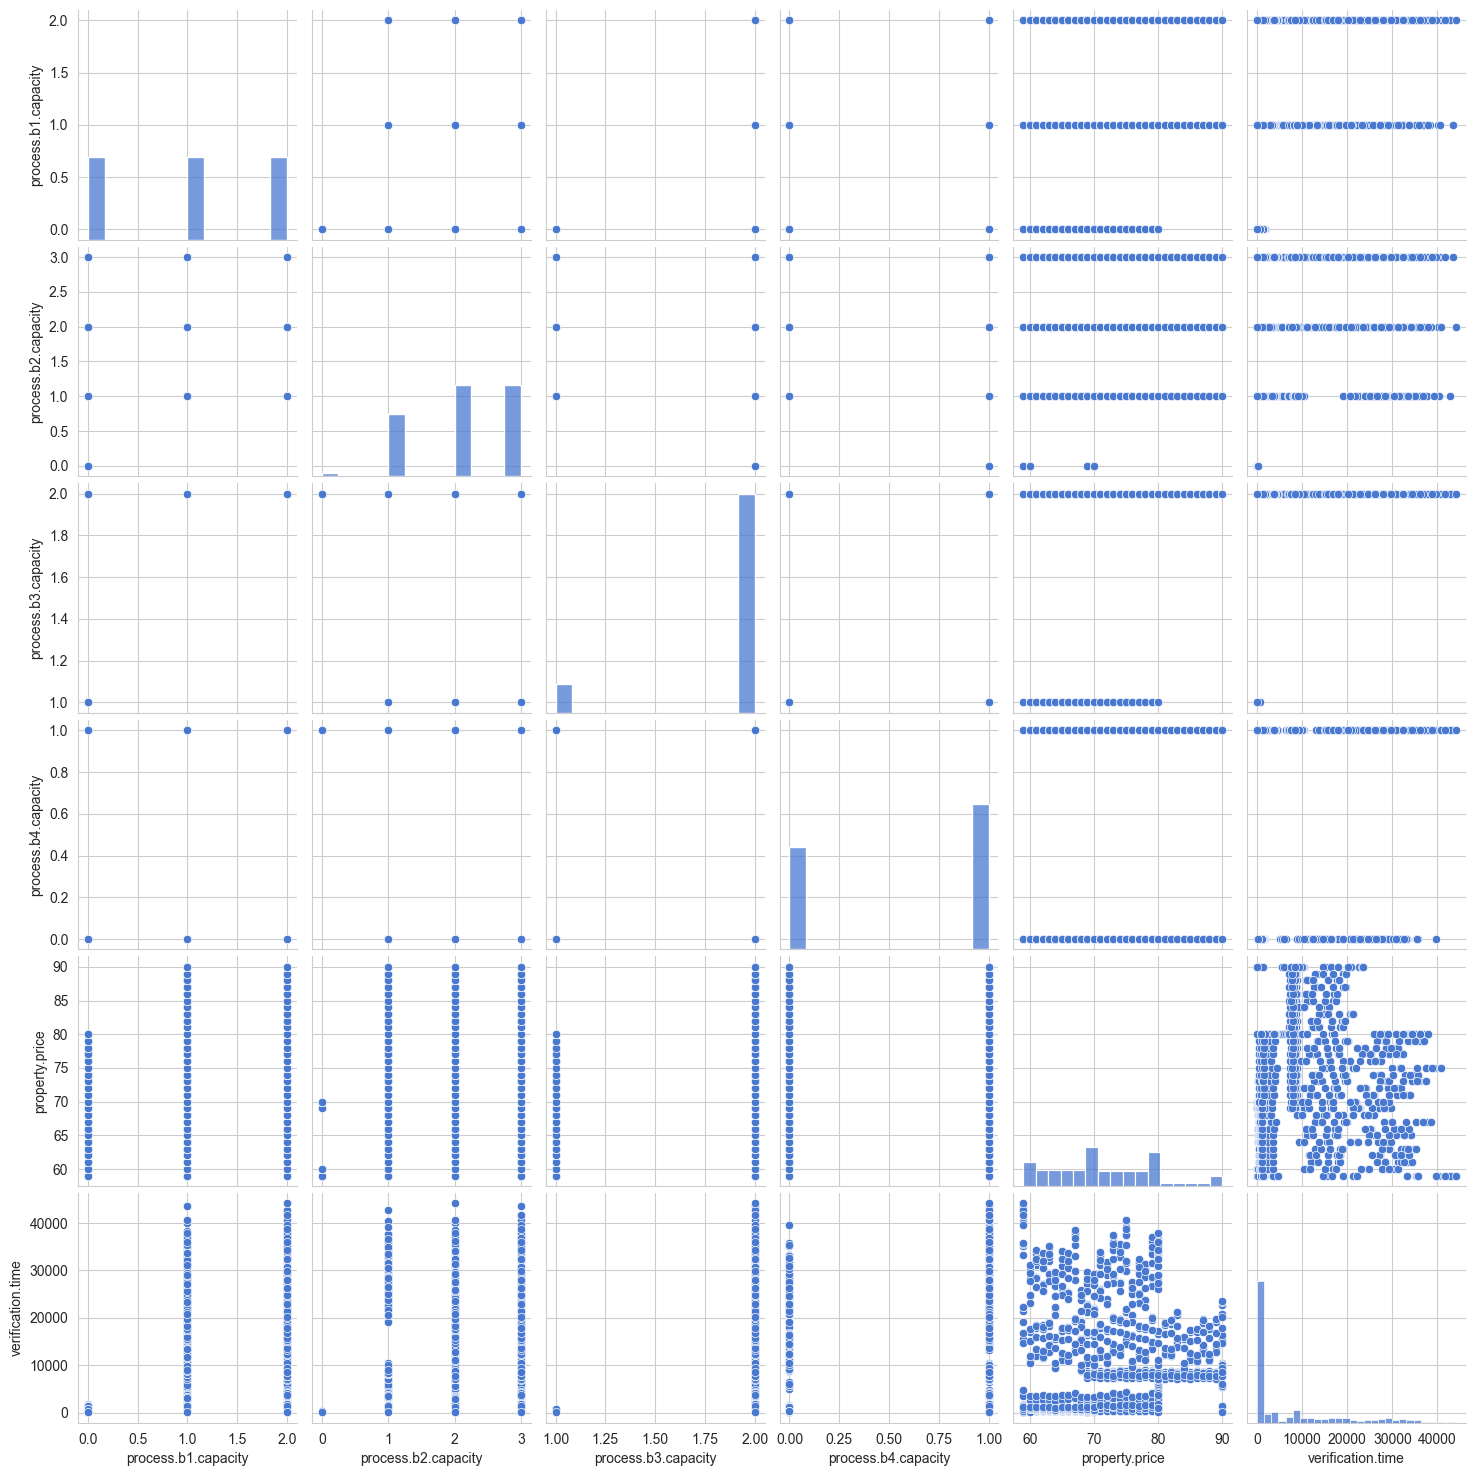

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style("whitegrid")
sns.set_palette("muted")
sns.pairplot(labeled_data)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'process.b1.capacity'),
  Text(1.5, 0, 'process.b2.capacity'),
  Text(2.5, 0, 'process.b3.capacity'),
  Text(3.5, 0, 'process.b4.capacity'),
  Text(4.5, 0, 'property.price'),
  Text(5.5, 0, 'property.product'),
  Text(6.5, 0, 'property.winner'),
  Text(7.5, 0, 'verification.time')])

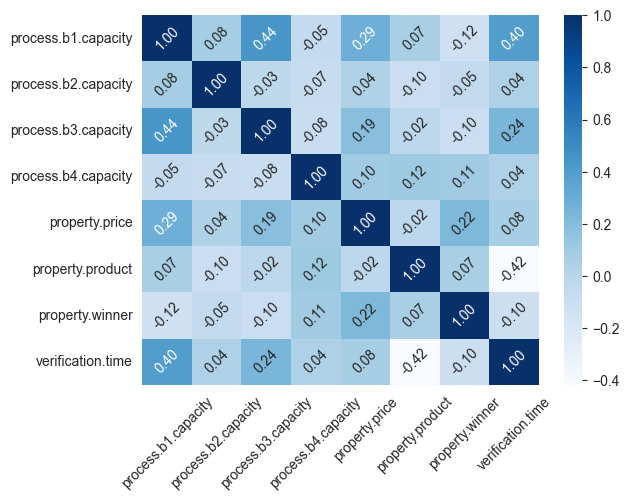

In [7]:
corr = labeled_data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", annot_kws={"rotation": 45})
plt.xticks(rotation=45)

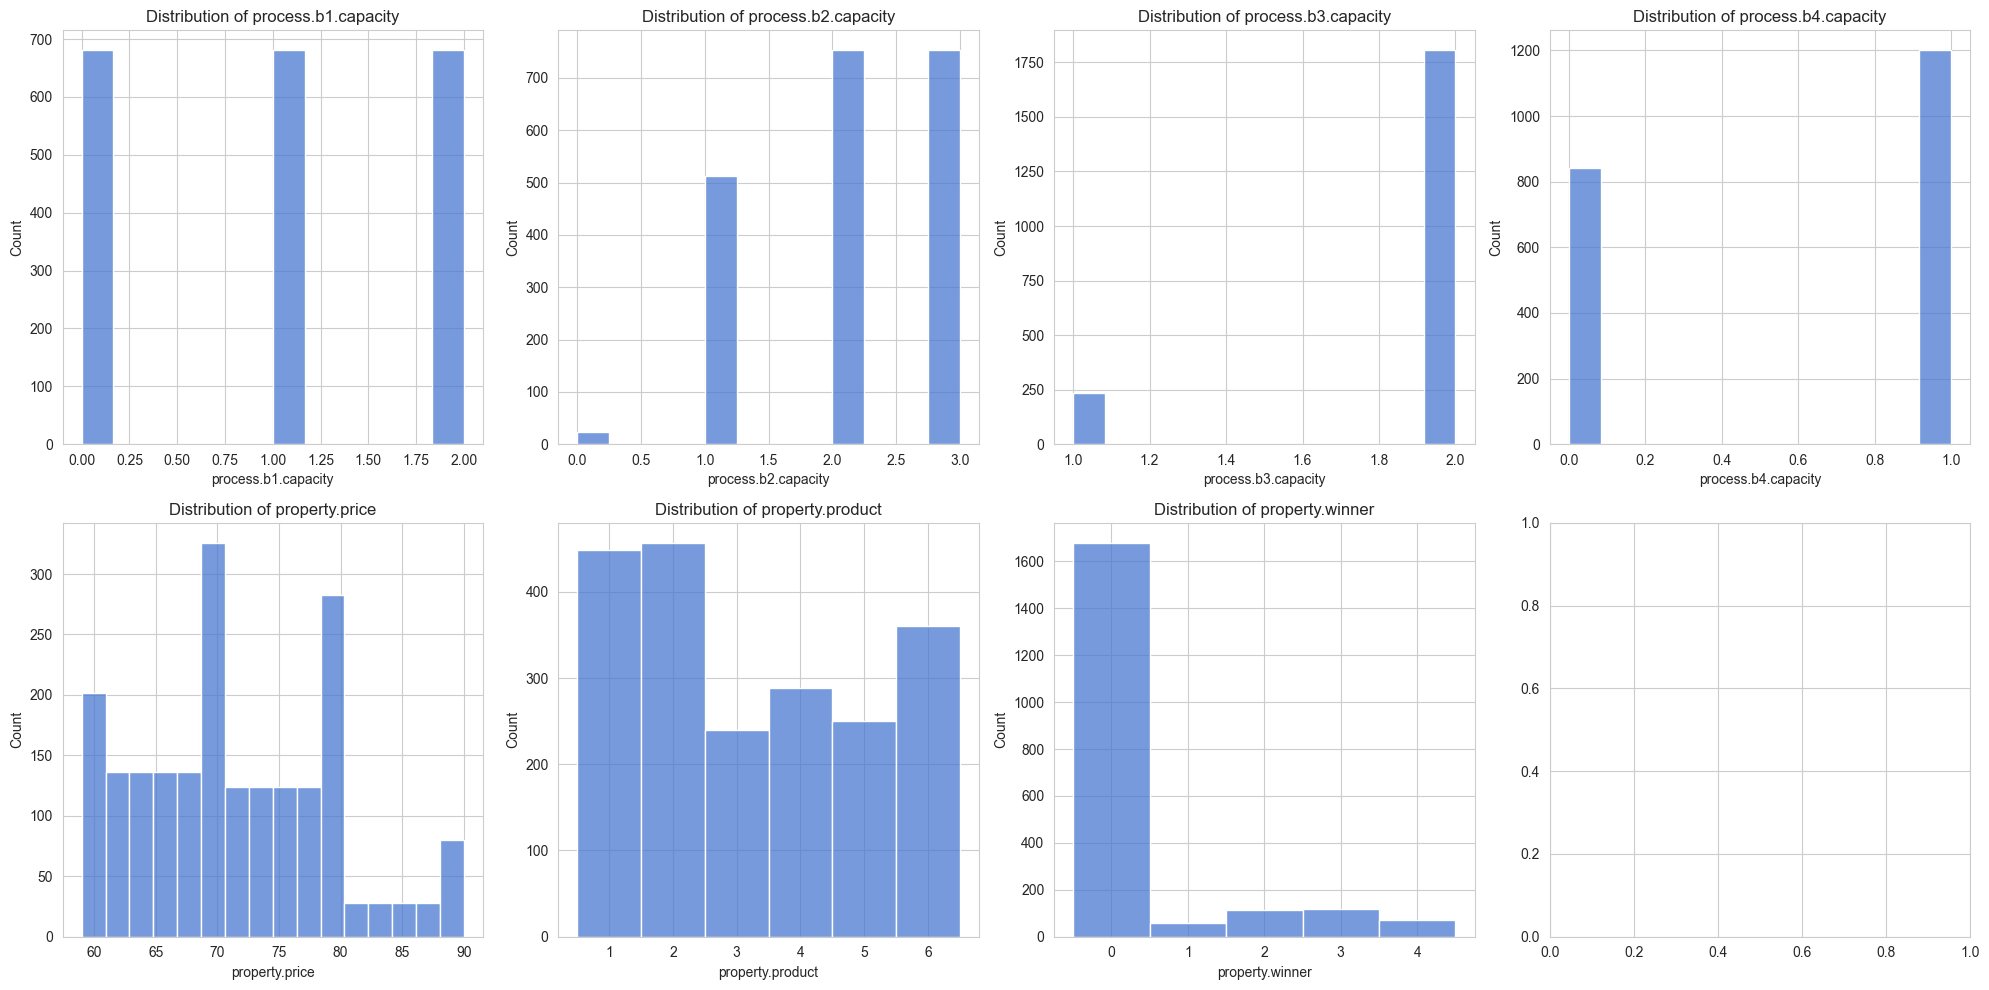

In [8]:
fig, axes = plt.subplots(
    nrows=2,
    ncols=(len(X.columns) + 1) // 2,
    figsize=(5 * ((len(X.columns) + 1) // 2), 10),
)

for ax, feature in zip(axes.flatten(), X.columns):
    sns.histplot(labeled_data, x=feature, ax=ax)
    ax.set_title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

In [9]:
cat_atr_list = [
    "process.b1.capacity",
    "process.b2.capacity",
    "process.b3.capacity",
    "process.b4.capacity",
    "property.price",
    "property.product",
    "property.winner",
]
num_atr_list = ["property.price"]

In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_atr_list),
        ("cat", OneHotEncoder(sparse_output=False), cat_atr_list),
    ]
)
catboost_preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_atr_list),
        ("cat", "passthrough", cat_atr_list),
    ]
)

In [11]:
from sklearn.model_selection import train_test_split


X_prep = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_prep, y, test_size=0.25, random_state=42
)

X_prep_cat = catboost_preprocessor.fit_transform(X)
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(
    X_prep_cat, y, test_size=0.25, random_state=42
)

In [12]:
from tabpfn import TabPFNRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import time
import warnings

warnings.filterwarnings("ignore")


models = {
    "TabPFN": TabPFNRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(verbose=-1),
    "CatBoost": CatBoostRegressor(verbose=0),
}

for name, model in models.items():
    if model.__class__.__name__ == "CatBoostRegressor":
        start = time.time()
        model.fit(X_train_cat, y_train_cat)
        stop = time.time()
    else:
        start = time.time()
        model.fit(X_train, y_train)
        stop = time.time()
    print(f"{name} training time: {stop - start:.2f}s")

TabPFN training time: 1.84s
XGBoost training time: 0.25s
LightGBM training time: 0.37s
CatBoost training time: 2.33s


In [13]:
import numpy as np

results = {}


def calculate_aic(n, mse, k):
    return n * np.log(mse) + 2 * k


def calculate_bic(n, mse, k):
    return n * np.log(mse) + k * np.log(n)


n = len(y_test)
k = X_test.shape[1]

for name, model in models.items():
    start = time.time()
    y_pred = (
        model.predict(X_test)
        if model.__class__.__name__ != "CatBoostRegressor"
        else model.predict(X_test_cat)
    )
    stop = time.time()
    print(f"{name} prediction time: {stop - start:.2f}s")
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    aic = calculate_aic(n, mse, k)
    bic = calculate_bic(n, mse, k)
    results[name] = {
        "MSE": round(mse, 2),
        "RMSE": round(rmse, 2),
        "R^2": round(r2, 2),
        "AIC": round(aic, 2),
        "BIC": round(bic, 2),
    }
    print(
        f"{name} \nMSE: {round(mse, 2)}, \nRMSE: {round(rmse, 2)}, \nR^2: {round(r2, 2)}, \nBIC: {round(bic, 2)}, \nAIC: {round(aic, 2)}."
    )

TabPFN prediction time: 2597.84s
TabPFN 
MSE: 294994.23, 
RMSE: 543.13, 
R^2: 1.0, 
BIC: 6778.9, 
AIC: 6545.9.
XGBoost prediction time: 0.03s
XGBoost 
MSE: 200774.87, 
RMSE: 448.08, 
R^2: 1.0, 
BIC: 6582.28, 
AIC: 6349.28.
LightGBM prediction time: 0.03s
LightGBM 
MSE: 1621371.06, 
RMSE: 1273.33, 
R^2: 0.98, 
BIC: 7649.68, 
AIC: 7416.68.
CatBoost prediction time: 0.03s
CatBoost 
MSE: 242238.32, 
RMSE: 492.18, 
R^2: 1.0, 
BIC: 6678.21, 
AIC: 6445.21.


In [14]:
results_df = pd.DataFrame(results)

In [15]:
results_df

,TabPFN,XGBoost,LightGBM,CatBoost
MSE,294994.23,200774.87,1621371.06,242238.32
RMSE,543.13,448.08,1273.33,492.18
R^2,1.00,1.00,0.98,1.00
AIC,6545.90,6349.28,7416.68,6445.21
BIC,6778.90,6582.28,7649.68,6678.21
